In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mne

In [2]:
import GetICCValues as iccValues
import dataFile as getData

In [26]:
REFERENCE_NAME = 'averageReference'
FEATURE_NAME = 'AbsolutePowerFeature'
FEATURE_LIST = getData.getFeatureList('AbsolutePowerFeature')
ELECTRODE_LIST = getData.getElectrodeList()
EPOCH_LIST = [4]
SUBJECT_LIST = ['sub1.bin', 'sub2.bin', 'sub3.bin', 'sub4.bin', 'sub5.bin']

In [27]:
numFeature = len(FEATURE_LIST)
numElectrode = len(ELECTRODE_LIST)
numEpoch = len(EPOCH_LIST)

In [28]:
#epoch[featureList[electrodes]]]
iccValuesArr = iccValues.getICCValues(SUBJECT_LIST, FEATURE_NAME, REFERENCE_NAME, EPOCH_LIST)

In [29]:
mneInfo = mne.create_info(ch_names = ELECTRODE_LIST, ch_types = ['eeg'] * numElectrode, sfreq=250)
mneInfo.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>

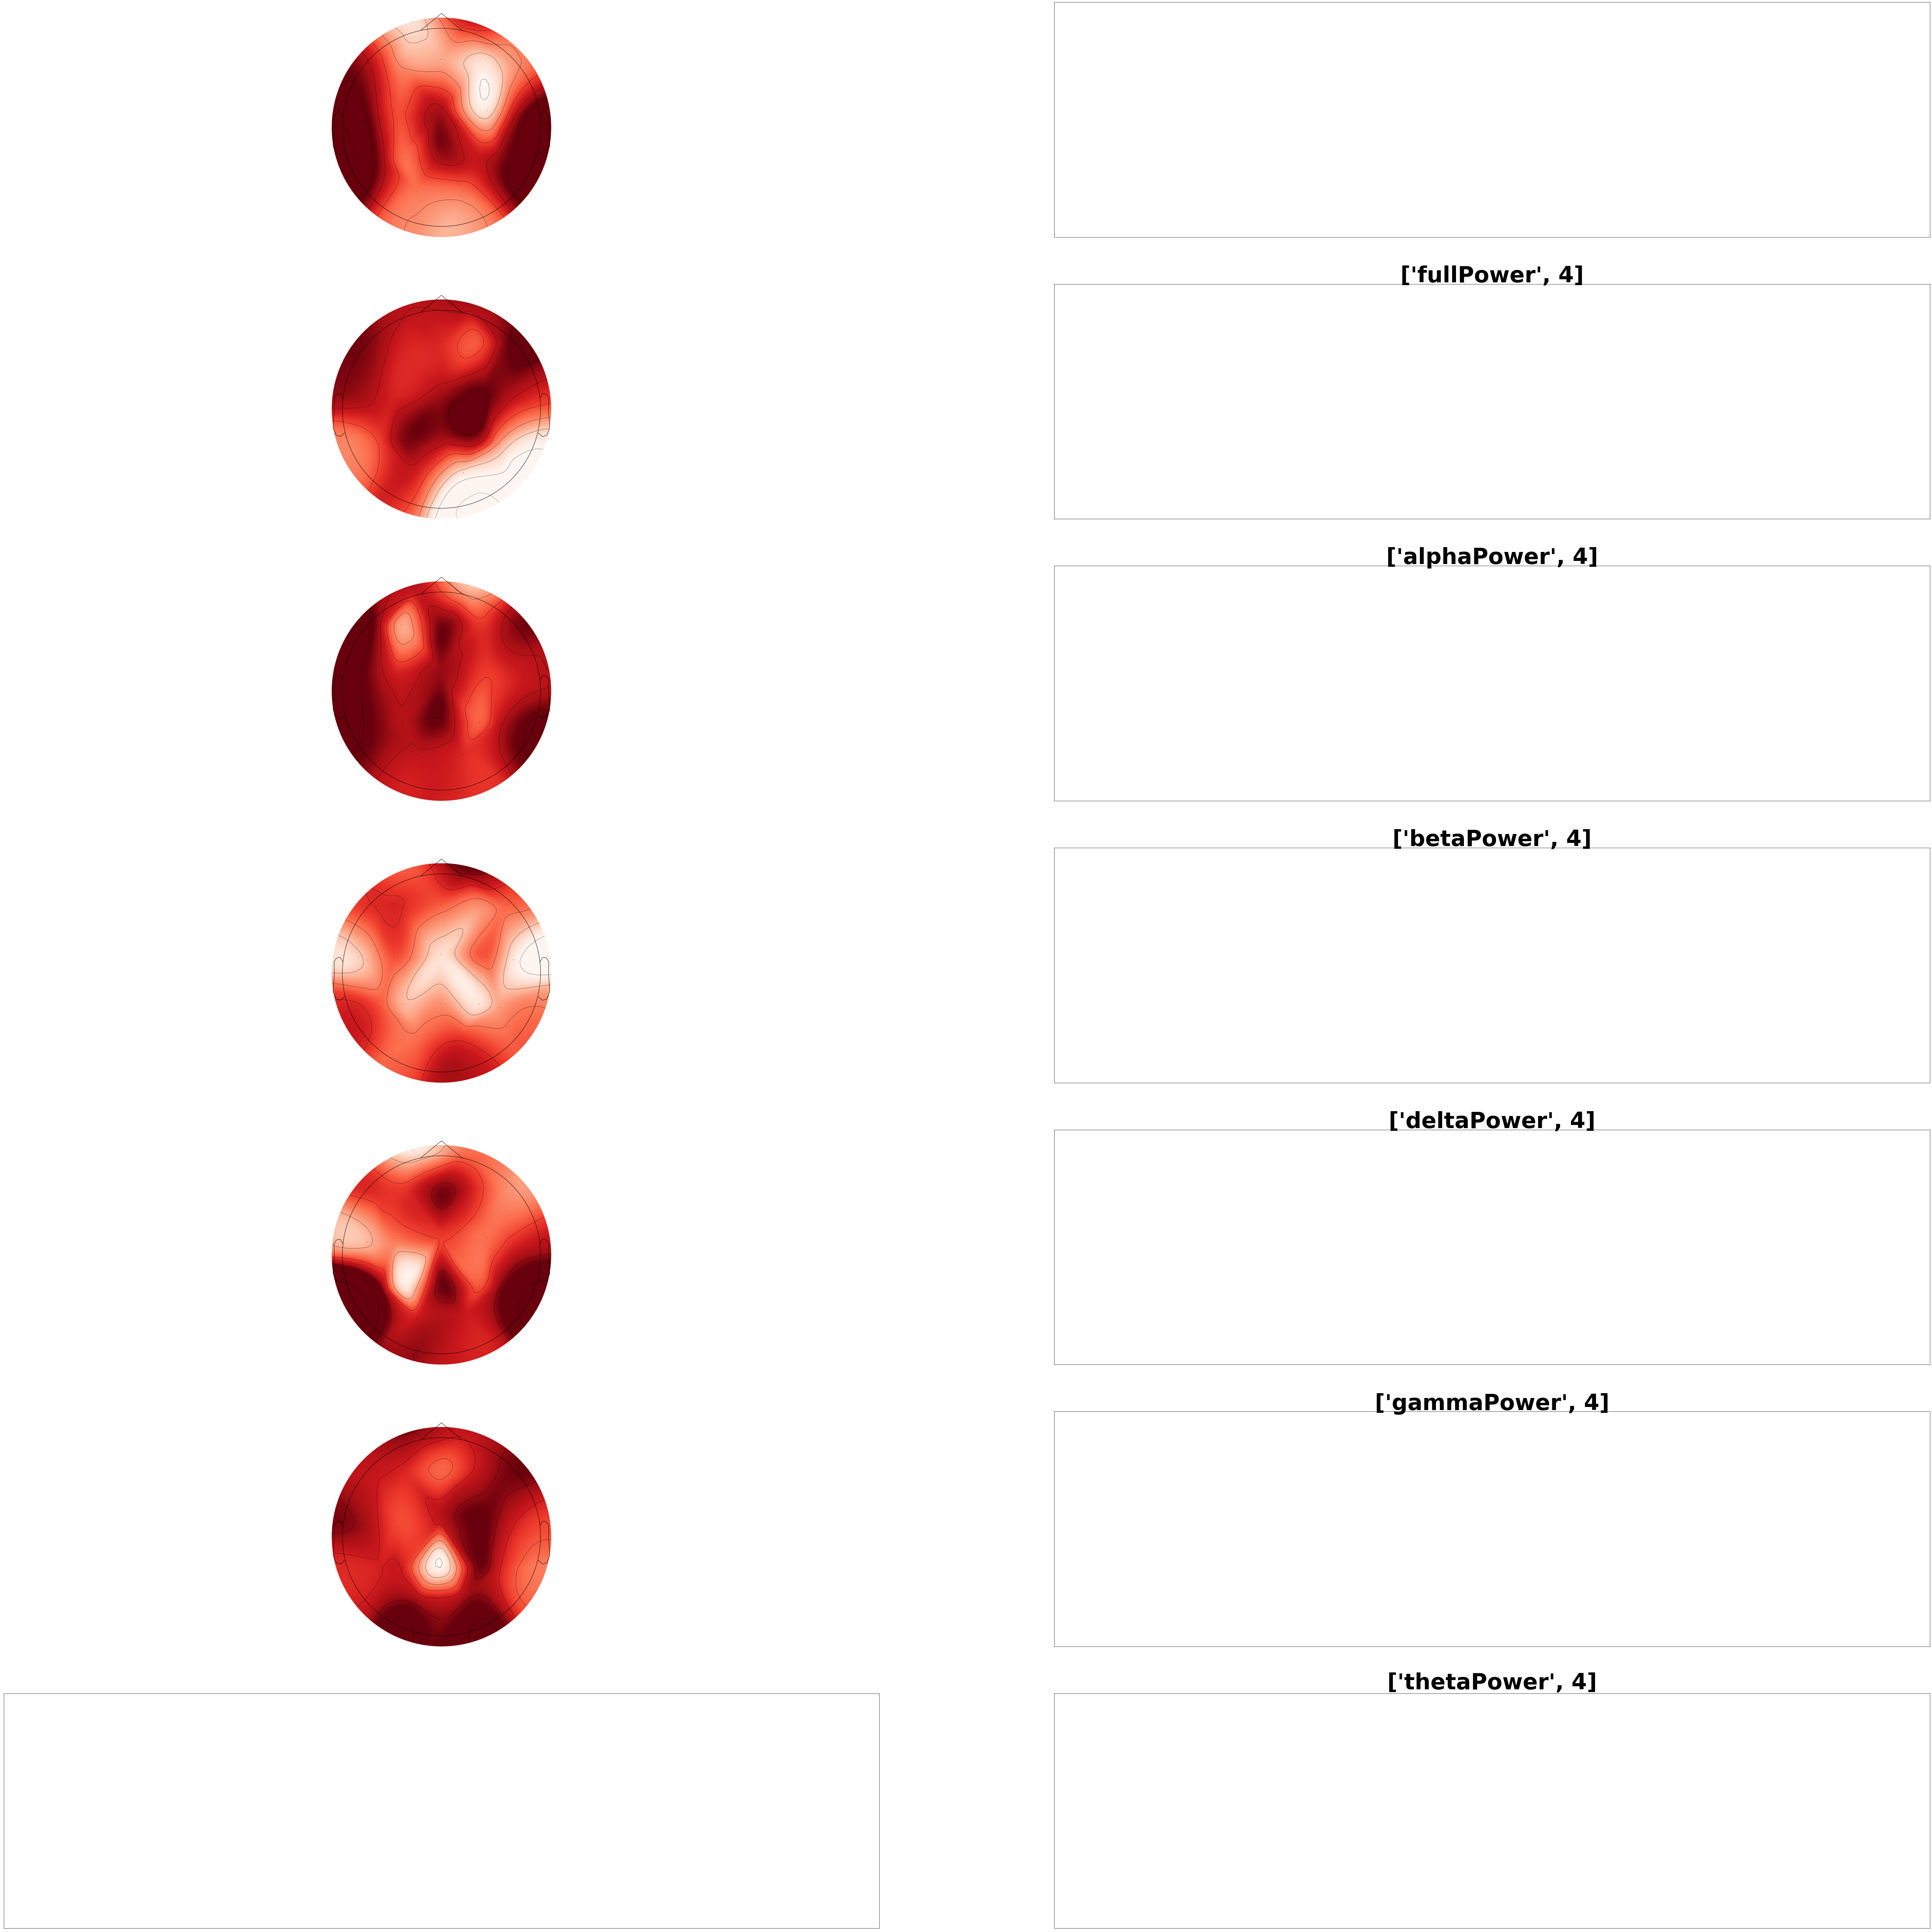

In [33]:
fig, ax = plt.subplots(ncols=numEpoch+1, nrows=numFeature+1, figsize=(100, 100), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

for epoch in range(0, numEpoch):
    epoch_num = EPOCH_LIST[epoch]
    for feature in range(0, numFeature):
        feature_name = FEATURE_LIST[feature]
        dataToPlot = iccValuesArr[epoch][feature]
        mne.viz.plot_topomap(dataToPlot, mneInfo, axes = ax[feature][epoch], show = False)
        ax[feature+1][epoch+1].set_title([feature_name, epoch_num], fontweight='bold', fontsize=64)

In [31]:
dataToPlot = iccValuesArr[epoch][feature]
mne.viz.plot_topomap(dataToPlot, mneInfo, axes = ax[feature][epoch], show = False)

(<matplotlib.image.AxesImage at 0x7f7eb9348a30>,
 <matplotlib.contour.QuadContourSet at 0x7f7eb9348340>)

<Figure size 432x288 with 0 Axes>